In [1]:
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

In [6]:
d = 1
sigma_theta =torch.eye(d)
mu_theta =torch.zeros(d)
prior_distribution = torch.distributions.MultivariateNormal(mu_theta, sigma_theta) 

prior_log_prob = lambda samples: prior_distribution.log_prob(samples)

num_samples = 2000
theta =prior_distribution.sample([num_samples])

sigma_simulateur = .5
f = lambda y: 100*torch.ones(d)@y.T+0
simulateur= lambda theta: f(theta) + torch.randn(theta.shape[0])*sigma_simulateur

x = simulateur(theta).unsqueeze(-1)

theta_0 = torch.ones(d)
number_observations= 20
x0 = simulateur(theta_0.unsqueeze(0).repeat(number_observations, 1))

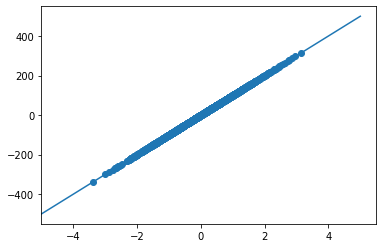

In [7]:
plt.scatter(theta[:,0].numpy(), x.numpy())
tt = torch.linspace(-5,5,100)
plt.plot(tt,f(tt.unsqueeze(-1)))
hist = plt.hist(x0.numpy(), orientation ='horizontal', bins = 20, density = True, bottom = -5)

c:\users\ea264728\pycharmprojects\sbi\venv\lib\site-packages\torch\distributions\wishart.py:231: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


torch.Size([20000, 1])
torch.Size([20000, 1])


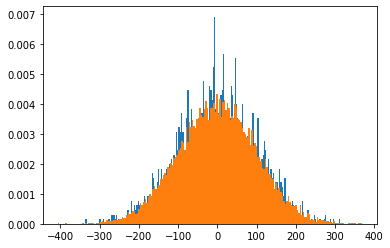

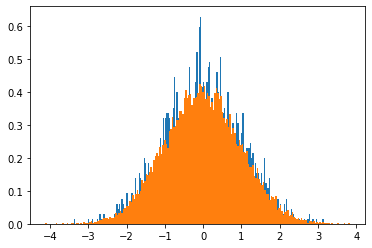

In [8]:
N = num_samples

hist = plt.hist(x.numpy(),density= True, bins = 200)
mu_0_x = torch.zeros(1)
Psi_0_x = torch.eye(1)
lbda_x = 1
nu_x = 1
lbda_N_x = lbda_x + N
nu_N_x = nu_x + N
empirical_mean_x = torch.mean(x, dim =0)
mu_N_x = (lbda_x*mu_0_x + N*empirical_mean_x)/lbda_N_x
S_x = torch.cov(x.T)*(N-1)
temp_x = (empirical_mean_x-mu_0_x).unsqueeze(-1)
Psi_N_x = Psi_0_x + S_x + (lbda_x*N*temp_x@temp_x.T)/(lbda_N_x)
sigma_x = torch.inverse(torch.distributions.Wishart(nu_N_x,torch.inverse(Psi_N_x)).sample())
mu_x = torch.distributions.MultivariateNormal(mu_N_x, sigma_x/lbda_N_x).sample()

new_samples = torch.distributions.MultivariateNormal(mu_x, sigma_x).sample([20000])
print(new_samples.shape)
hist = plt.hist(new_samples.numpy(),density = True, bins = 200)
plt.figure()
hist = plt.hist(theta.numpy(),density= True, bins = 200)
mu_0_x = torch.zeros(1)
Psi_0_x = torch.eye(1)
lbda_x = 1
nu_x = 1
lbda_N_x = lbda_x + N
nu_N_x = nu_x + N
empirical_mean_x = torch.mean(theta, dim =0)
mu_N_x = (lbda_x*mu_0_x + N*empirical_mean_x)/lbda_N_x
S_x = torch.cov(theta.T)*(N-1)
temp_x = (empirical_mean_x-mu_0_x).unsqueeze(-1)
Psi_N_x = Psi_0_x + S_x + (lbda_x*N*temp_x@temp_x.T)/(lbda_N_x)
sigma_x = torch.inverse(torch.distributions.Wishart(nu_N_x,torch.inverse(Psi_N_x)).sample())
mu_x = torch.distributions.MultivariateNormal(mu_N_x, sigma_x/lbda_N_x).sample()

new_samples = torch.distributions.MultivariateNormal(mu_x, sigma_x).sample([20000])
print(new_samples.shape)
hist = plt.hist(new_samples.numpy(),density = True, bins = 200)

In [9]:
z = torch.randint(low = 0, high = 10, size = [x.shape[0]])
cluster_population = torch.tensor([z[z==value].shape[0] for value in torch.unique(z)])

In [10]:
def sample_posterior_inverse_wishart(d_x,d_theta):
    N = d_x.shape[0]
    
    lbda_N_theta = lbda_theta + N
    nu_N_theta = nu_theta + N
    empirical_mean_theta = torch.mean(d_theta, dim =0)
    mu_N_theta = (lbda_theta*mu_0_theta + N*empirical_mean_theta)/lbda_N_theta
    S_theta = torch.cov(d_theta.T)*(N-1)
    temp_theta = (empirical_mean_theta-mu_0_theta).unsqueeze(-1)
    Psi_N_theta = Psi_0_theta + S_theta + (lbda_theta*N*temp_theta@temp_theta.T)/(lbda_N_theta)
    
    lbda_N_x = lbda_x + N
    nu_N_x = nu_x + N
    empirical_mean_x = torch.mean(d_x, dim =0)
    mu_N_x = (lbda_x*mu_0_x + N*empirical_mean_x)/lbda_N_x
    S_x = torch.cov(d_x.T)*(N-1)
    temp_x = (empirical_mean_x-mu_0_x).unsqueeze(-1)
    Psi_N_x = Psi_0_x + S_x + (lbda_x*N*temp_x@temp_x.T)/(lbda_N_x)
    
    sigma_theta = torch.inverse(torch.distributions.Wishart(nu_N_theta,torch.inverse(Psi_N_theta)).sample())
    mu_theta = torch.distributions.MultivariateNormal(mu_N_theta, sigma_theta/lbda_N_theta).sample()
    sigma_x = torch.inverse(torch.distributions.Wishart(nu_N_x,torch.inverse(Psi_N_x)).sample())
    mu_x = torch.distributions.MultivariateNormal(mu_N_x, sigma_x/lbda_N_x).sample()
    return sigma_theta, mu_theta, sigma_x, mu_x

In [11]:
number_gibbs_steps = 1

###Initialise random elements
mu_0_theta = torch.zeros(1)
Psi_0_theta = torch.eye(1)
lbda_theta = 1
nu_theta = 1
mu_0_x = torch.zeros(1)
Psi_0_x = torch.eye(1)
lbda_x = 1
nu_x = 1

sigma_theta = torch.inverse(torch.distributions.Wishart(nu_theta,torch.inverse(Psi_0_theta)).sample([1,1]))
mean_theta = torch.distributions.MultivariateNormal(mu_0_theta,sigma_theta/lbda_theta).sample([1,1])

sigma_x = torch.inverse(torch.distributions.Wishart(nu_x,torch.inverse(Psi_0_x)).sample([1,1]))
mean_x = torch.distributions.MultivariateNormal(mu_0_x,sigma_x/lbda_x).sample([1,1])

z = torch.zeros(x.shape[0])
z[-1] = 1
cluster_population = torch.tensor([z[z==value].shape[0] for value in torch.unique(z)])
number_of_clusters = cluster_population.shape[0]

for i in range(number_gibbs_steps):
    #sample allocation
    for i,allocation in enumerate(z):
        print('index_ = ' +str(i))
        print('allocation = ' + str(allocation))
        z_i = torch.cat([z[:i], z[i+1:]], dim =0)
        cluster_population_i = torch.tensor([z_i[z_i==value].shape[0] for value in torch.unique(z_i)])
        number_of_clusters_i = cluster_population.shape[0]
        if number_of_clusters_i!= number_of_clusters:
            for j in range(number_of_clusters_i):
                if cluster_population[j]!=cluster_population_i[j]:
                    to_remove = j
                    z_i[z_i < torch.ones(z_i.shape)*j] = z_i[z_i < torch.ones(z_i.shape)*j] - 1
            

        
        
    #given allocation sample model
    list_sigma_theta = []
    list_mu_theta = []
    list_sigma_x = []
    list_mu_x = []
    for c in torch.unique(z):
        data_x = x[z==c]
        data_theta = theta[z==c]
        sigma_c_theta, mu_c_theta, sigma_c_x, mu_c_x = sample_posterior_inverse_wishart(data_x,data_theta)
        list_sigma_theta.append(sigma_c_theta)
        list_mu_theta.append(mu_c_theta)
        list_sigma_x.append(sigma_c_x)
        list_mu_x.append(mu_c_x)
    mean = torch.stack(list_mu_x, dim = 0)
    cov = torch.stack(list_sigma_x, dim=0)
    samples_x = torch.distributions.MultivariateNormal(mean, cov).sample([10000])
    plt.hist(samples_x[:,0,0].numpy(), bins = 200)

index_ = 0
allocation = tensor(0.)
index_ = 1
allocation = tensor(0.)
index_ = 2
allocation = tensor(0.)
index_ = 3
allocation = tensor(0.)
index_ = 4
allocation = tensor(0.)
index_ = 5
allocation = tensor(0.)
index_ = 6
allocation = tensor(0.)
index_ = 7
allocation = tensor(0.)
index_ = 8
allocation = tensor(0.)
index_ = 9
allocation = tensor(0.)
index_ = 10
allocation = tensor(0.)
index_ = 11
allocation = tensor(0.)
index_ = 12
allocation = tensor(0.)
index_ = 13
allocation = tensor(0.)
index_ = 14
allocation = tensor(0.)
index_ = 15
allocation = tensor(0.)
index_ = 16
allocation = tensor(0.)
index_ = 17
allocation = tensor(0.)
index_ = 18
allocation = tensor(0.)
index_ = 19
allocation = tensor(0.)
index_ = 20
allocation = tensor(0.)
index_ = 21
allocation = tensor(0.)
index_ = 22
allocation = tensor(0.)
index_ = 23
allocation = tensor(0.)
index_ = 24
allocation = tensor(0.)
index_ = 25
allocation = tensor(0.)
index_ = 26
allocation = tensor(0.)
index_ = 27
allocation = tensor(0.)
in

index_ = 1209
allocation = tensor(0.)
index_ = 1210
allocation = tensor(0.)
index_ = 1211
allocation = tensor(0.)
index_ = 1212
allocation = tensor(0.)
index_ = 1213
allocation = tensor(0.)
index_ = 1214
allocation = tensor(0.)
index_ = 1215
allocation = tensor(0.)
index_ = 1216
allocation = tensor(0.)
index_ = 1217
allocation = tensor(0.)
index_ = 1218
allocation = tensor(0.)
index_ = 1219
allocation = tensor(0.)
index_ = 1220
allocation = tensor(0.)
index_ = 1221
allocation = tensor(0.)
index_ = 1222
allocation = tensor(0.)
index_ = 1223
allocation = tensor(0.)
index_ = 1224
allocation = tensor(0.)
index_ = 1225
allocation = tensor(0.)
index_ = 1226
allocation = tensor(0.)
index_ = 1227
allocation = tensor(0.)
index_ = 1228
allocation = tensor(0.)
index_ = 1229
allocation = tensor(0.)
index_ = 1230
allocation = tensor(0.)
index_ = 1231
allocation = tensor(0.)
index_ = 1232
allocation = tensor(0.)
index_ = 1233
allocation = tensor(0.)
index_ = 1234
allocation = tensor(0.)
index_ = 123

C:\Users\EA264728\AppData\Local\Temp\ipykernel_24268\954094914.py:8: UserWarning: cov(): degrees of freedom is <= 0 (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Correlation.cpp:99.)
  S_theta = torch.cov(d_theta.T)*(N-1)
C:\Users\EA264728\AppData\Local\Temp\ipykernel_24268\954094914.py:16: UserWarning: cov(): degrees of freedom is <= 0 (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Correlation.cpp:99.)
  S_x = torch.cov(d_x.T)*(N-1)


ValueError: Expected parameter covariance_matrix (Tensor of shape (1, 1)) of distribution Wishart(covariance_matrix: tensor([[nan]]), df: 2.0) to satisfy the constraint PositiveDefinite(), but found invalid values:
tensor([[nan]])

In [29]:
def compute_posterior_predictive(yi,z)

In [31]:
a[2:]

[3, 4]